# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Мы фиксируем сиды для того чтобы генерация рандомом была одинаковая при разных итерация запуска ячеек, т.е. для воспроизводимости эксперимента")

Мы фиксируем сиды для того чтобы генерация рандомом была одинаковая при разных итерация запуска ячеек, т.е. для воспроизводимости эксперимента


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
sample_size = 10

rand_rows = df_train.sample(n=sample_size)
print(rand_rows)

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
print(df_test.head(5))
print(df_test.tail(5))

                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 b

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [9]:
print('Основные статистики числовых признаков тренировочной выборки:')
print(df_train.describe())
print('\n')
print('Основные статистики категориальных признаков тренировочной выборки:')
print(df_train.describe(include='object'))


Основные статистики числовых признаков тренировочной выборки:
              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


Основные статистики категориальных признаков тренировочной выборки:
                          name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   

In [10]:
print('Основные статистики числовых признаков Тестовой выборки:')
print(df_test.describe())
print('\n')
print('Основные статистики категориальных признаков Тестовой выборки:')
print(df_test.describe(include='object'))

Основные статистики числовых признаков Тестовой выборки:
              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000


Основные статистики категориальных признаков Тестовой выборки:
                       name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                 

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
# your code here
print((df_train.isnull()).any(axis=0))
print('\nЗначит в тренировочном датасете есть пропуски в данных в столбцах: mileage, engine, max_power, torque, seats')
print()
print((df_test.isnull()).any(axis=0))
print('\nЗначит в тестовом датасете есть пропуски в данных в ТЕХ ЖЕ столбцах: mileage, engine, max_power, torque, seats')

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

Значит в тренировочном датасете есть пропуски в данных в столбцах: mileage, engine, max_power, torque, seats

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

Значит в тестовом датасете есть пропуски в данных в ТЕХ ЖЕ столбцах: mileage, engine, max_power, torque, seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [12]:
# your code here
df_train_cut_price = df_train.drop('selling_price', axis=1)
dupl = df_train_cut_price.duplicated()
indexes_to_delete = dupl[dupl == True].index.to_list()

cnt_dupl = len(indexes_to_delete)
print(f'Количество дублирующихся объектов в трейне = {cnt_dupl}')

Количество дублирующихся объектов в трейне = 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
# your code here
df_train_duplicate = df_train.loc[indexes_to_delete]
print(df_train_duplicate)

                                          name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
# your code here
df_train_without_dupl = df_train.drop(indexes_to_delete) # я насколько понял, duplicate работает так, что первая найденная строка не является
# дублирующей ко второй, но вторая является дублирующей к первой, потому мы оставляем в df только Первые строки из найденных дублей, 
# потому что у первой строки как раз dupl = False, а у последующих = True

In [15]:
assert df_train_without_dupl.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
# your code here
df_train_without_dupl.index = range(df_train_without_dupl.shape[0])

In [17]:
import regex as re
import numpy as np

def check_reg(value):
    pattern_int = ('\d+')
    pattern_float = ('\d+\.\d+')
    match = re.search(pattern_int, value)
    if match:
        return value
    else:
        match = re.search(pattern_float, value) # я вот тут хотел использовать вот такую конструкцию re.search(pattern_int | pattern_float, value) - но питон ругался, мб вы можжете подсказать почему так?
        if match:
            return value
        else:
            return np.nan
        
def del_ed_izmeren(value):
    type_value = type(value)
    if type_value == str:
        list_val = value.split(' ')
        rez = check_reg(list_val[0])
        return float(rez) # я не преобразовываю весь столбец целиком, а заполняю его только float-значениями и после проверки в .info() 
    #  видно что столбец теперь имеет тип float

def cut_cat(df):
    return df.drop(['torque','selling_price'], axis=1)

def cut_name(df):
    return df.drop('name', axis=1)

def cut_izmeren_column(df):
    for column in ['mileage', 'engine', 'max_power']:
        df[column] = df[column].apply(del_ed_izmeren)
    return df

def cnt_loss(df):
    dictt = dict()
    for column in df.columns:
        count = df[column].apply(pd.isnull).sum()
        if count != 0:
            dictt[column] = count
    return dictt

def put_median(df):
    loss_dict = cnt_loss(df)
    for column in loss_dict.keys():
        median = df[column].median()
        df[column] = df[column].fillna(median)
    return df

def change_to_int(df):
    for column in ['engine', 'seats']:
        df[column] = df[column].astype(int)
    return df

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [18]:
# объединю и тренировочный и тестовый ДФ в один, чтобы все преобразования сразу делать ток с 1 ДФ
cnt_train_df = len(df_train_without_dupl) # это нужно чтобы суметь разделить обратно
cnt_test_df = len(df_test)

y_train = df_train_without_dupl['selling_price'] # мы их ниже отрезаем насовсем, потому сохраним Y сейчас
y_test = df_test['selling_price']

train_test_df = pd.concat([df_train_without_dupl,df_test],axis=0,ignore_index=True)


train_test_df = cut_cat(train_test_df)
train_test_df = cut_izmeren_column(train_test_df)
train_test_df = cut_name(train_test_df)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [19]:
# your code here
train_test_null_dict = cnt_loss(train_test_df)

for column in train_test_null_dict.keys():
    median = train_test_df[column].median()

    train_test_df[column] = train_test_df[column].fillna(median)

train_test_null_dict = cnt_loss(train_test_df)

if not train_test_null_dict: print('Пропусков не осталось')

Пропусков не осталось



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [20]:
print(df_train['seats'].value_counts())
print("\nПотому что количество разных значений, которое принимает seats - очень небольшое, и очевидно, что количество сидейний в машине\n ограничено физическим миром и составляет дискретный набор значений")

seats
5.0     5393
7.0      944
8.0      208
4.0      104
9.0       72
6.0       54
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

Потому что количество разных значений, которое принимает seats - очень небольшое, и очевидно, что количество сидейний в машине
 ограничено физическим миром и составляет дискретный набор значений


In [21]:
# your code here
train_test_df = change_to_int(train_test_df)
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6840 non-null   int64  
 1   km_driven     6840 non-null   int64  
 2   fuel          6840 non-null   object 
 3   seller_type   6840 non-null   object 
 4   transmission  6840 non-null   object 
 5   owner         6840 non-null   object 
 6   mileage       6840 non-null   float64
 7   engine        6840 non-null   int32  
 8   max_power     6840 non-null   float64
 9   seats         6840 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 481.1+ KB


In [22]:
# разделим train и test обратно на 2 ДФ
df_train_after_part_1 = train_test_df.head(cnt_train_df)
df_test_after_part_1 = train_test_df.tail(cnt_test_df)
# и индексы теста обновим
df_test_after_part_1.index = range(df_test_after_part_1.shape[0])


In [23]:
df_train_after_part_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5840 non-null   int64  
 1   km_driven     5840 non-null   int64  
 2   fuel          5840 non-null   object 
 3   seller_type   5840 non-null   object 
 4   transmission  5840 non-null   object 
 5   owner         5840 non-null   object 
 6   mileage       5840 non-null   float64
 7   engine        5840 non-null   int32  
 8   max_power     5840 non-null   float64
 9   seats         5840 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 410.8+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

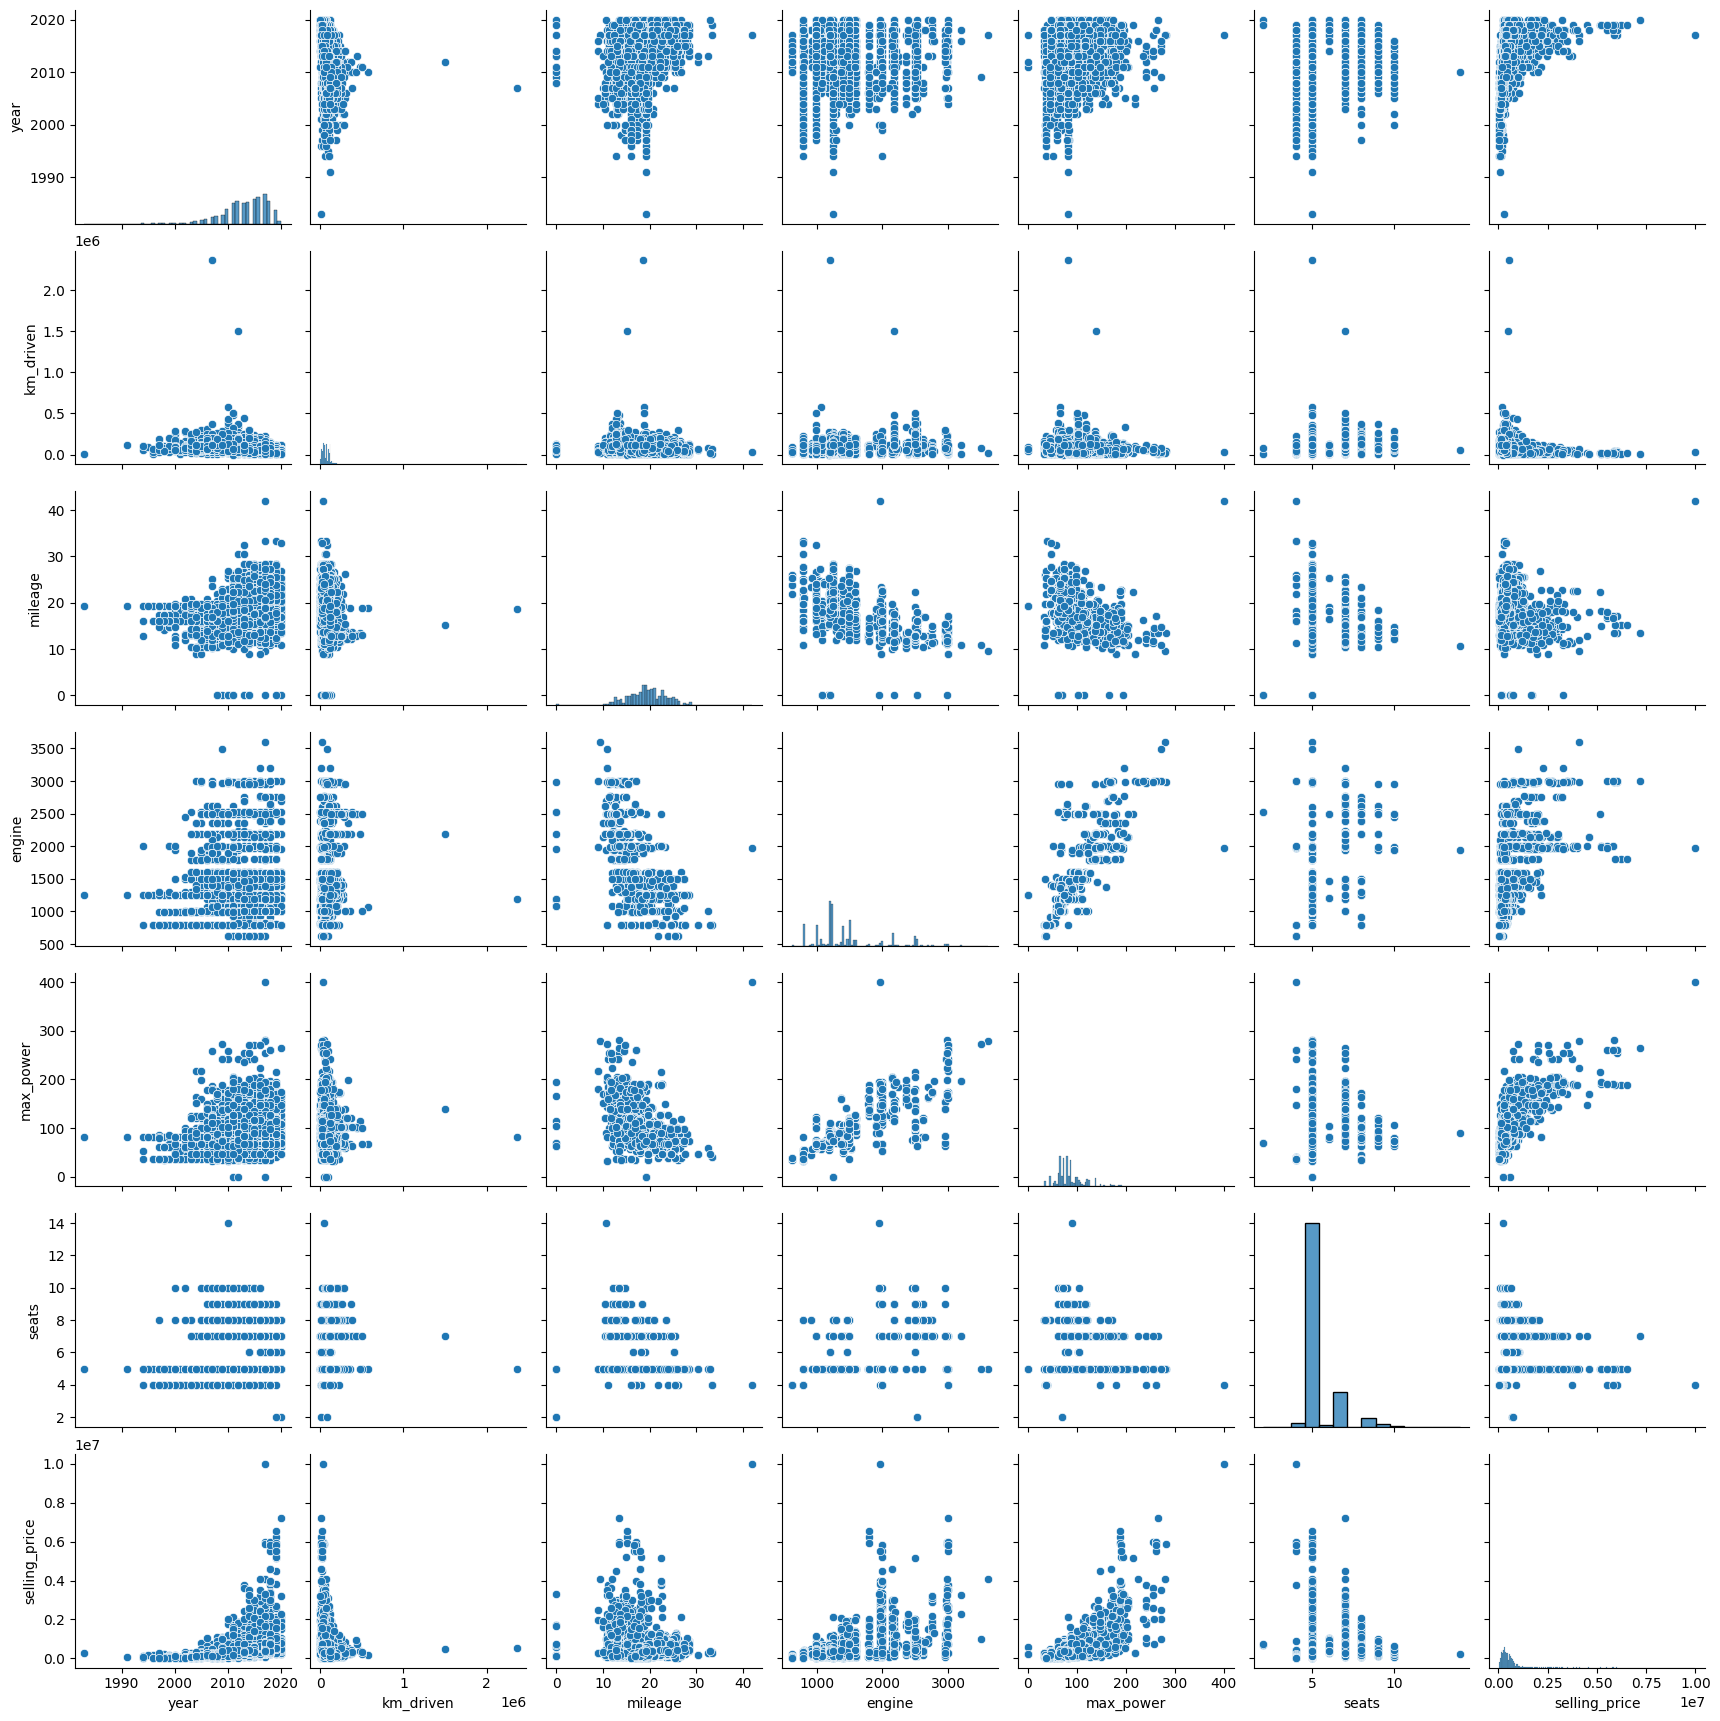

In [24]:
# your code here
df_train_for_vizualization = pd.concat([df_train_after_part_1, y_train], axis=1)

sns.pairplot(df_train_for_vizualization)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [25]:
print('Можно говорить о значимом прямой зависимости selling_price с предикторами: year, engine и max_power')
print('\nПризнаки тоже зависимы между собой:\n1) от года выпуска (year) прямо зависит расход топлива (mileage) и обратно зависит от пробега (km_driven)')
print('2) Пробег(km_driven) также несколько зависит от размера двигателя(engine) -> люди на сильных машинах больше ездят')
print('3) Pасход топлива(mileage) обратно кррелирует с объемом движка(engine), макс мощностью(max_power) и количеством мест(seats)')
print('4) Объем двигателя(engine) прямо корр с макс мощностью(max_power) и кол-вом мест(seats)')

Можно говорить о значимом прямой зависимости selling_price с предикторами: year, engine и max_power

Признаки тоже зависимы между собой:
1) от года выпуска (year) прямо зависит расход топлива (mileage) и обратно зависит от пробега (km_driven)
2) Пробег(km_driven) также несколько зависит от размера двигателя(engine) -> люди на сильных машинах больше ездят
3) Pасход топлива(mileage) обратно кррелирует с объемом движка(engine), макс мощностью(max_power) и количеством мест(seats)
4) Объем двигателя(engine) прямо корр с макс мощностью(max_power) и кол-вом мест(seats)


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

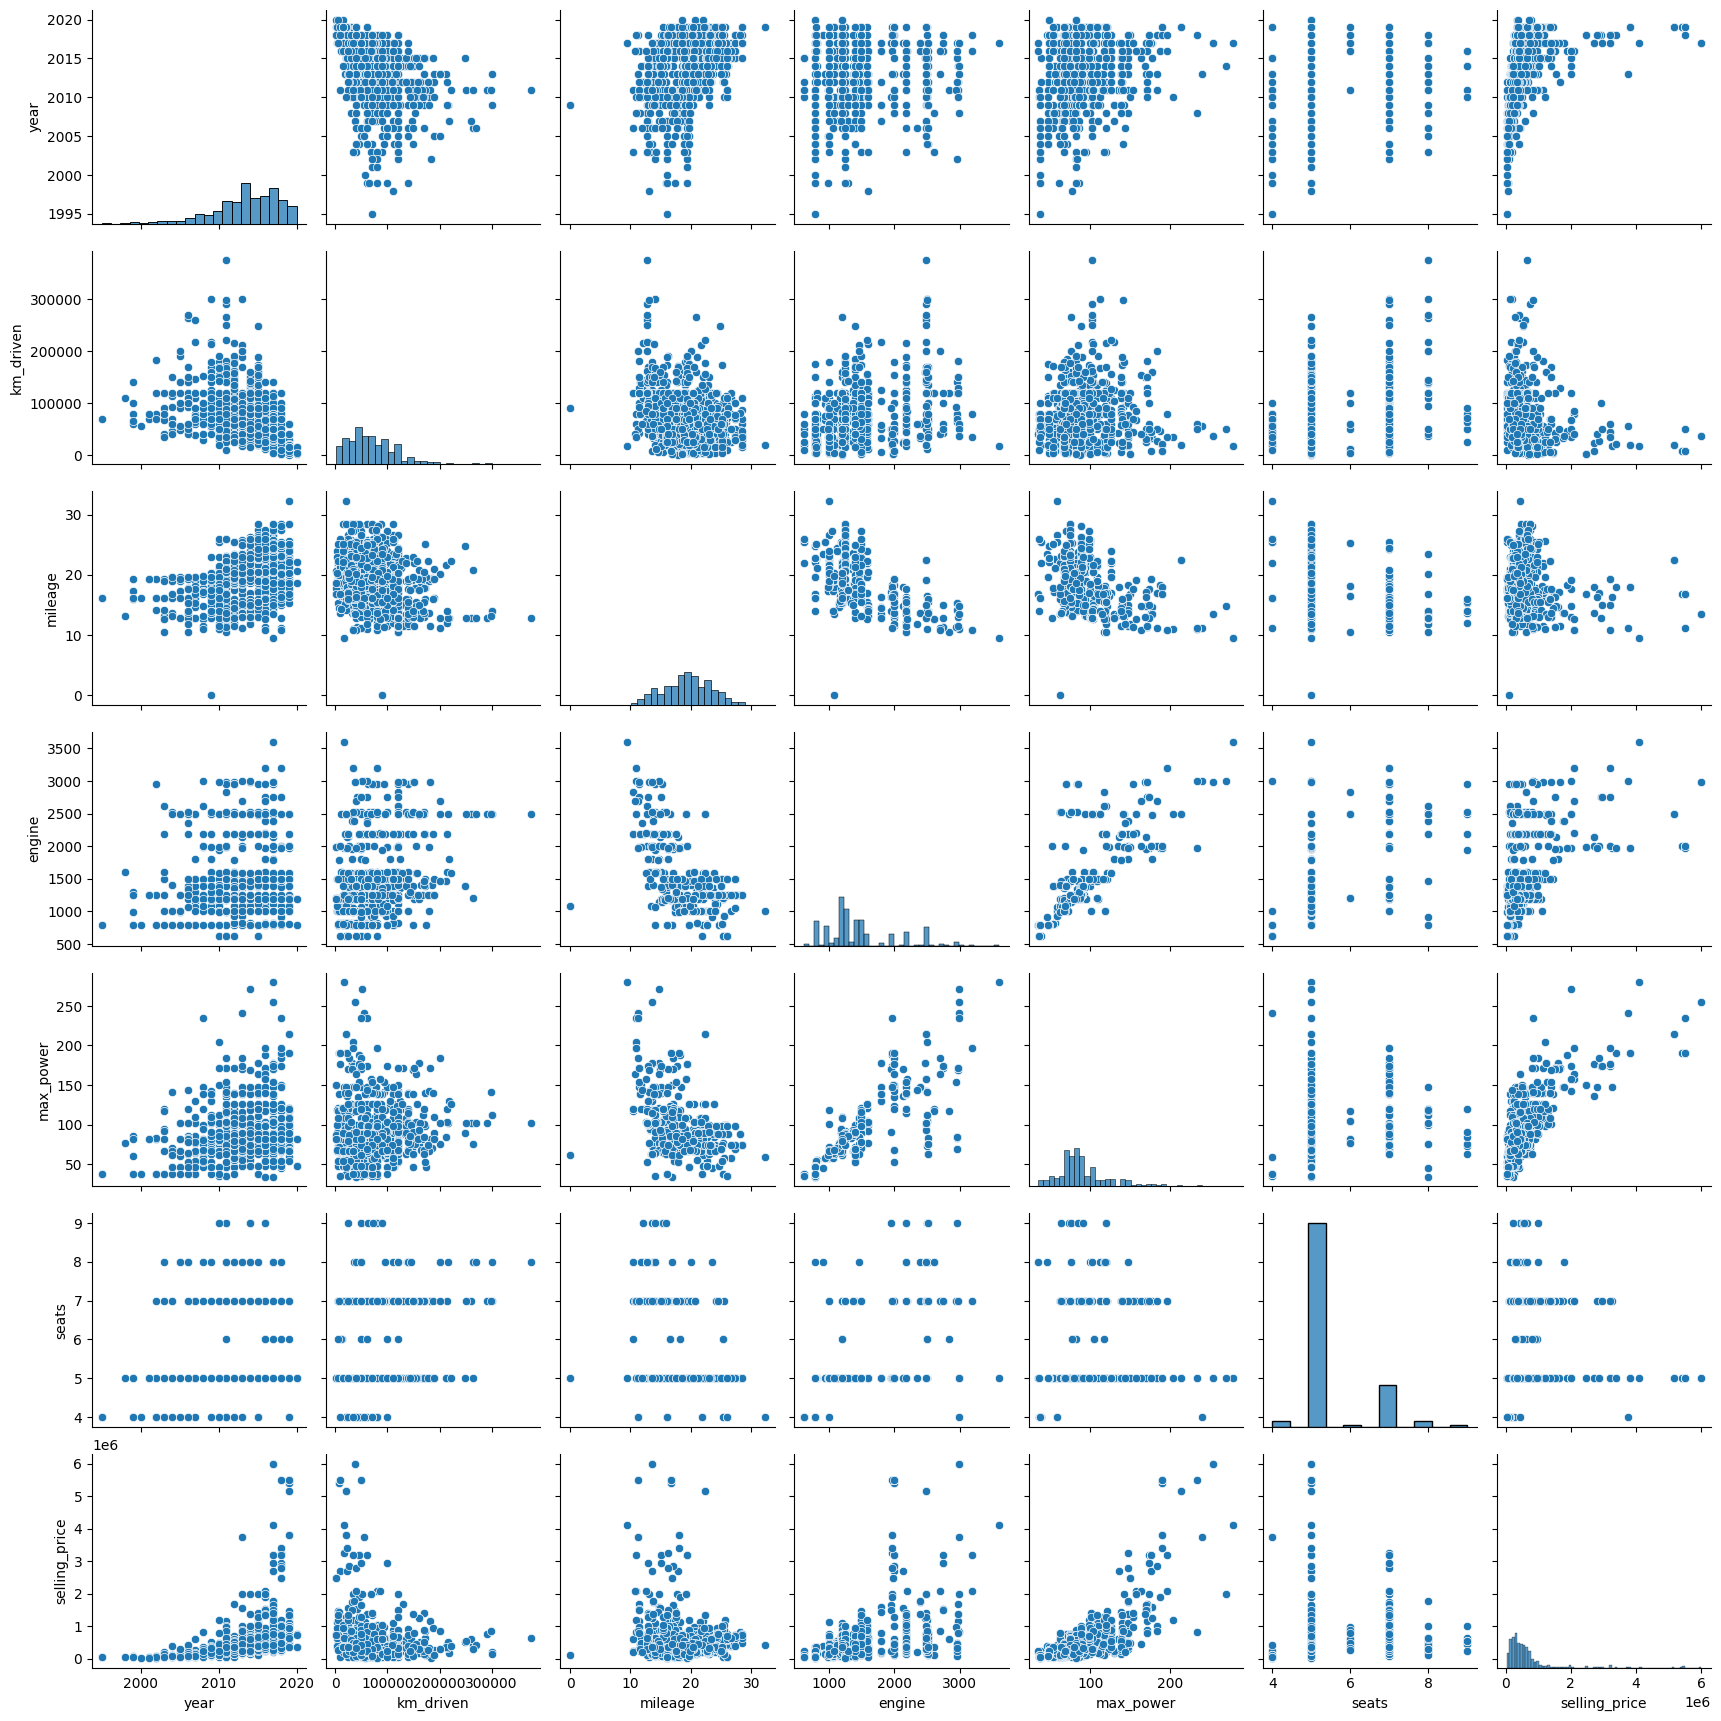

Да, выборки похожи, форма графиков и направление трендов в целом совпадают


In [26]:
# your code here
df_test_for_vizualization = pd.concat([df_test_after_part_1, y_test], axis=1)

sns.pairplot(df_test_for_vizualization)
plt.show()
print('Да, выборки похожи, форма графиков и направление трендов в целом совпадают')

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [27]:
def is_colunm_num(column):
    if column.dtype!='object':
        return True
    else:
        return False

In [28]:
def do_df_num_or_obj(df, num=True):
    rez_column_list = []
    for column in df.columns.values:
        if num == True:
            if is_colunm_num(df[column]) == True:
                rez_column_list.append(column)
        else:
            if is_colunm_num(df[column]) == False:
                rez_column_list.append(column)
    return df[rez_column_list]

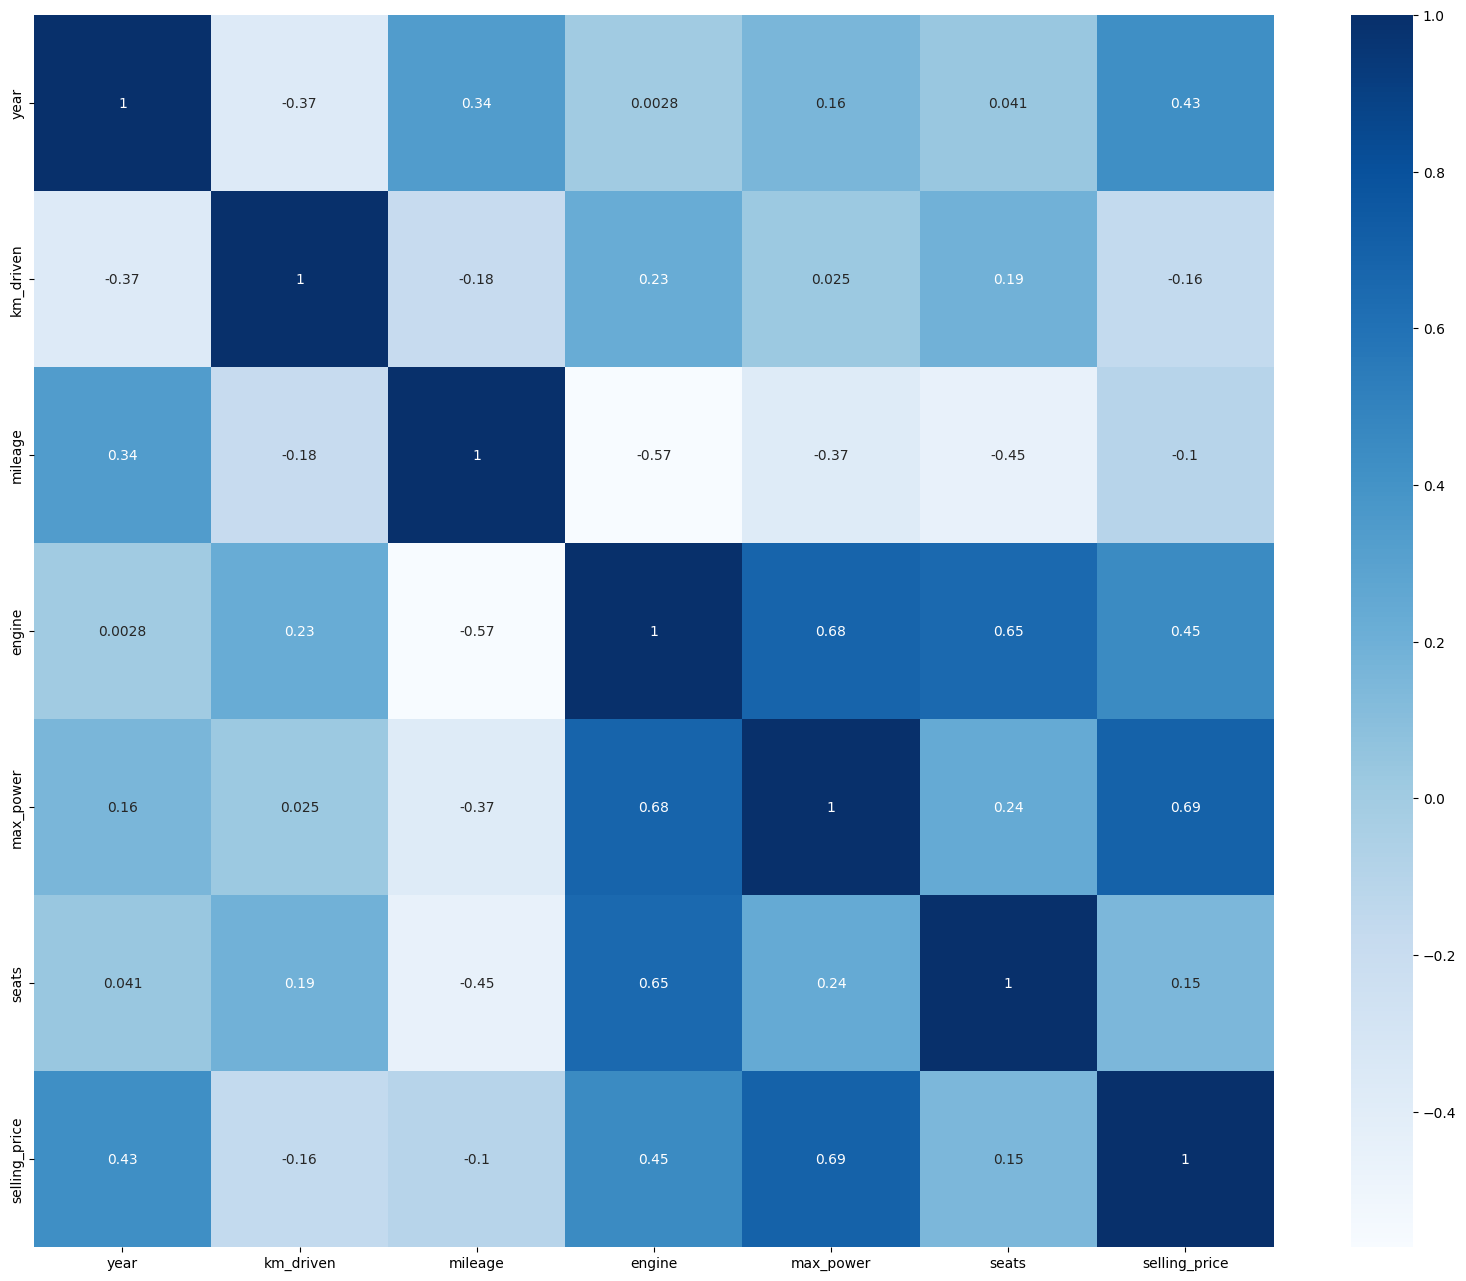

In [29]:
heat_map_train_df = do_df_num_or_obj(df_train_for_vizualization)
corrmat = heat_map_train_df.corr()
fichi = corrmat.index
plt.figure(figsize=(20,16))

g = sns.heatmap(heat_map_train_df[fichi].corr(), annot = True, cmap = 'Blues')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [30]:
# your code here
print('Между собой наименее скоррелированы признаки объем движка(engine) и год выпуска(year)\n')
print('буду считать довольно сильной положительной зависимостью те признаки, у которых коррел > 0,5 и это:')
print('1) объем движка(engine) и макс мощность(max_power)\n2) объем движка(engine) и кол-во мест(seats)')
#print('\n3) ТУТ вопрос терминологии, считается ли таргет признаком, и если да - то \n еще м\у собой знач корелируют макс мощность и цена продажи\n')
print('\nДа, можно считать что чем новее машина - тем меньше у нее пробег')

Между собой наименее скоррелированы признаки объем движка(engine) и год выпуска(year)

буду считать довольно сильной положительной зависимостью те признаки, у которых коррел > 0,5 и это:
1) объем движка(engine) и макс мощность(max_power)
2) объем движка(engine) и кол-во мест(seats)

Да, можно считать что чем новее машина - тем меньше у нее пробег


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

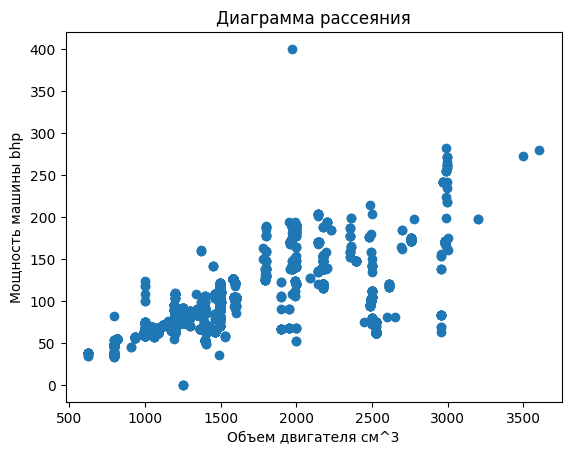

In [31]:
plt.scatter(x=heat_map_train_df['engine'], y=heat_map_train_df['max_power'])
plt.title('Диаграмма рассеяния')
plt.xlabel('Объем двигателя см^3')
plt.ylabel('Мощность машины bhp')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [32]:
y_train = y_train #ранее я уже отделил ее
X_train_only_num = do_df_num_or_obj(df_train_after_part_1)

In [33]:
assert X_train_only_num.shape == (5840, 6)

In [34]:
y_test = y_test
X_test_only_num = do_df_num_or_obj(df_test_after_part_1)

In [35]:
assert X_test_only_num.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

model = LinearRegression()
model.fit(X_train_only_num, y_train)

pred_train_lin_reg_1 = model.predict(X_train_only_num)
pred_test_lin_reg_1 = model.predict(X_test_only_num)


print(f'Для обычной лин регресии без улучшений Предсказание Теста: r_2={r2_score(y_test, pred_test_lin_reg_1)}, а MSE={MSE(y_test, pred_test_lin_reg_1)}')
print(f'Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2={r2_score(y_train, pred_train_lin_reg_1)}, а MSE={MSE(y_train, pred_train_lin_reg_1)}')

Для обычной лин регресии без улучшений Предсказание Теста: r_2=0.5941418736481369, а MSE=233298840564.96674
Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2=0.5922575099811493, а MSE=116874629816.91049


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [37]:
# your code here
simple_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
pipe_num = Pipeline([('imputer', simple_imputer), ('scaler', std_scaler)])

scale_train_num = pipe_num.fit_transform(X_train_only_num)
scale_train_df_num = pd.DataFrame(scale_train_num, columns=pipe_num['scaler'].get_feature_names_out(X_train_only_num.columns))

scale_test_num = pipe_num.fit_transform(X_test_only_num)
scale_test_df_num = pd.DataFrame(scale_test_num, columns=pipe_num['scaler'].get_feature_names_out(X_test_only_num.columns))

#--------------------------------------------------------------------------------------------------------------------
model.fit(scale_train_df_num, y_train)
pred_train_lin_reg_2 = model.predict(scale_train_df_num)
pred_test_lin_reg_2 = model.predict(scale_test_df_num)

print(f'После заполнения пропусков и Скейла Лин регресия Предсказание Теста: r_2={r2_score(y_test, pred_test_lin_reg_2)}, а MSE={MSE(y_test, pred_test_lin_reg_2)}')
print(f'Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2={r2_score(y_train, pred_train_lin_reg_2)}, а MSE={MSE(y_train, pred_train_lin_reg_2)}')

После заполнения пропусков и Скейла Лин регресия Предсказание Теста: r_2=0.5653751703911727, а MSE=249834763048.64722
Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2=0.5922575099811495, а MSE=116874629816.91046


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [38]:
# your code here
print(model.coef_)
print()
print(model.coef_[4])

print('Наибольшлее влияние оказывает параметр max_power')

[152766.04798676 -44158.92277362  28822.32572087  61170.18067098
 322808.76719948 -23212.05994604]

322808.76719947846
Наибольшлее влияние оказывает параметр max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [39]:
from sklearn.linear_model import Lasso

# your code here
model_lasso = Lasso()
model_lasso.fit(scale_train_df_num, y_train)

pred_train_Lasso_reg = model_lasso.predict(scale_train_df_num)
pred_test_Lasso_reg = model_lasso.predict(scale_test_df_num)

print(f'Для Lasso регресии Предсказание Теста: r_2={r2_score(y_test, pred_test_Lasso_reg)}, а MSE={MSE(y_test, pred_test_Lasso_reg)}')
print(f'Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2={r2_score(y_train, pred_train_Lasso_reg)}, а MSE={MSE(y_train, pred_train_Lasso_reg)}')

Для Lasso регресии Предсказание Теста: r_2=0.5653739157028566, а MSE=249835484279.31976
Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2=0.5922575099458642, а MSE=116874629827.02457


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [40]:
# your code here
print(model_lasso.coef_)
print('\nПотому что никакие веса не являются мелкими и незначительными')

[152765.86815595 -44157.79396619  28820.44329093  61165.34874695
 322809.65077168 -23209.1829728 ]

Потому что никакие веса не являются мелкими и незначительными


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [41]:
from sklearn.model_selection import GridSearchCV

# your code here
grid_search_Lasso = GridSearchCV(model_lasso, {'alpha':range(30000)}, cv=10, n_jobs=-1)
grid_result_Lasso = grid_search_Lasso.fit(scale_train_df_num, y_train)

grid_result_Lasso.best_estimator_.fit(scale_train_df_num, y_train)

pred_train_Lasso_Grid = grid_result_Lasso.best_estimator_.predict(scale_train_df_num)
pred_test_Lasso_Grid = grid_result_Lasso.best_estimator_.predict(scale_test_df_num)

print(f'Для Lasso регресии, с подобраным через ГРИД коэф регуляризации Предсказание Теста: r_2={r2_score(y_test, pred_test_Lasso_Grid)}, а MSE={MSE(y_test, pred_test_Lasso_Grid)}')
print(f'Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2={r2_score(y_train, pred_train_Lasso_Grid)}, а MSE={MSE(y_train, pred_train_Lasso_Grid)}')


Для Lasso регресии, с подобраным через ГРИД коэф регуляризации Предсказание Теста: r_2=0.5334678587200375, а MSE=268175996930.8715
Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2=0.5825815274255337, а MSE=119648137378.63206


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [42]:
# your code here
print('\nПри поиске лучших параметров грид проверяет все комбинации параметров,но в данном случае параметр один, но еще и 10 фолдов т.е. 30000*10=300000 раз')
best_alfa = grid_result_Lasso.best_params_['alpha']
print(grid_result_Lasso.best_estimator_.coef_)
print(f'Лучший коэф регуляризации оказался = {best_alfa}. Да, при такой регуляризации занулились веса у признаков milege, engine, seats')


При поиске лучших параметров грид проверяет все комбинации параметров,но в данном случае параметр один, но еще и 10 фолдов т.е. 30000*10=300000 раз
[145859.67220112 -15733.61589297      0.              0.
 321821.56184425     -0.        ]
Лучший коэф регуляризации оказался = 26609. Да, при такой регуляризации занулились веса у признаков milege, engine, seats


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [43]:
from sklearn.linear_model import ElasticNet
from numpy import arange

# your code here
model_elastic_net = ElasticNet()
l_1_rat = arange(0,1,0.01)
hyperparameter_space_E = {'alpha':range(100),
                        'l1_ratio':l_1_rat
                        }

grid_search_Elastic = GridSearchCV(model_elastic_net, hyperparameter_space_E, cv=10, n_jobs=-1)
grid_result_Elastic = grid_search_Elastic.fit(scale_train_df_num, y_train)

grid_result_Elastic.best_estimator_.fit(scale_train_df_num, y_train)

pred_train_Elastic_Grid = grid_result_Elastic.best_estimator_.predict(scale_train_df_num)
pred_test_Elastic_Grid = grid_result_Elastic.best_estimator_.predict(scale_test_df_num)

print(f'Для Elastic регресии, с подобранными ГРИД параметрами Предсказание Теста: r_2={r2_score(y_test, pred_test_Elastic_Grid)}, а MSE={MSE(y_test, pred_test_Elastic_Grid)}')
print(f'Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2={r2_score(y_train, pred_train_Elastic_Grid)}, а MSE={MSE(y_train, pred_train_Elastic_Grid)}')


Для Elastic регресии, с подобранными ГРИД параметрами Предсказание Теста: r_2=0.5327817342967701, а MSE=268570400842.08655
Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2=0.5845225261773899, а MSE=119091772721.6453


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [44]:
# your code here
best_alfa_E = grid_result_Elastic.best_params_['alpha']
best_l1_rat = grid_result_Elastic.best_params_['l1_ratio']
print(f'Лучший коэф регуляризации оказался = {best_alfa_E}, а l1_ratio = {best_l1_rat}')

Лучший коэф регуляризации оказался = 15, а l1_ratio = 0.99


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [45]:
# я здесь буду снова соединять трейн и тест, чтобы после OneHot не надо было сравнивать df в поисках различий (а они будут если сделать OneHot к трейну и тесту отдельно)
X_train_num_cat = df_train_after_part_1
X_test_num_cat = df_test_after_part_1

X_train_test_num_cat = pd.concat([X_train_num_cat,X_test_num_cat],axis=0,ignore_index=True)

In [46]:
X_train_test_num_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,6840,6840,6840,6840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3711,6060,6213,4226


In [47]:
assert X_train_num_cat.shape == (5840, 10)

In [48]:
X_train_num_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [49]:
simple_imputer = SimpleImputer(strategy='median') # пропишу в этом пайплайне еще и заполнение пустых значений, чтобы потом перенести полегче это в сервис
std_scaler = StandardScaler()
pipe_num = Pipeline([('imputer', simple_imputer), ('scaler', std_scaler)])

s_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
ohe_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
pipe_cat = Pipeline([('imputer', s_imputer), ('encoder', ohe_encoder)])

col_transformer = ColumnTransformer([('num_pp', pipe_num, [x for x in X_train_test_num_cat.columns if X_train_test_num_cat[x].dtype!='object']),
                                     ('cat_pp', pipe_cat, [x for x in X_train_test_num_cat.columns if (X_train_test_num_cat[x].dtype=='object' or x == 'seats')])])

res = col_transformer.fit_transform(X_train_test_num_cat)
res_df = pd.DataFrame(res, columns=col_transformer.get_feature_names_out())

train_aftet_pipline = res_df.head(cnt_train_df)
test_aftet_pipline = res_df.tail(cnt_test_df)

test_aftet_pipline.index = range(test_aftet_pipline.shape[0])


In [50]:
# сораним pipline в Пикле

pickle.dump(col_transformer, open('pipline.pkl', 'wb'))
pipline_pickle = pickle.load(open('pipline.pkl', 'rb'))

res_pickle = pipline_pickle.fit_transform(X_train_test_num_cat)
res_df_pickle = pd.DataFrame(res_pickle, columns=pipline_pickle.get_feature_names_out())

res_df_pickle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   num_pp__year                          6840 non-null   float64
 1   num_pp__km_driven                     6840 non-null   float64
 2   num_pp__mileage                       6840 non-null   float64
 3   num_pp__engine                        6840 non-null   float64
 4   num_pp__max_power                     6840 non-null   float64
 5   num_pp__seats                         6840 non-null   float64
 6   cat_pp__fuel_Diesel                   6840 non-null   float64
 7   cat_pp__fuel_LPG                      6840 non-null   float64
 8   cat_pp__fuel_Petrol                   6840 non-null   float64
 9   cat_pp__seller_type_Individual        6840 non-null   float64
 10  cat_pp__seller_type_Trustmark Dealer  6840 non-null   float64
 11  cat_pp__transmiss

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
model_Ridge = Ridge()
alfa_rige = arange(0.001,20, 0.005)
hiper_ridge = {'alpha':alfa_rige}

grid_search_Ridge = GridSearchCV(model_Ridge, hiper_ridge,scoring='r2', cv=10, n_jobs=-1) # в интернете пишут что если scoring не указывать то по дефолту scoring=r_2. зачем нужно было тут его указать?
grid_resalt_Ridge = grid_search_Ridge.fit(train_aftet_pipline, y_train)
grid_resalt_Ridge.best_estimator_.fit(train_aftet_pipline, y_train)

pred_train_Ridge_Grid = grid_resalt_Ridge.best_estimator_.predict(train_aftet_pipline)
pred_test_Ridge_Grid = grid_resalt_Ridge.best_estimator_.predict(test_aftet_pipline)

print(f'Для Ridge регресии, с подобранным ГРИД параметром и после Pipline Предсказание Теста: r_2={r2_score(y_test, pred_test_Ridge_Grid)}, а MSE={MSE(y_test, pred_test_Ridge_Grid)}')
print(f'Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2={r2_score(y_train, pred_train_Ridge_Grid)}, а MSE={MSE(y_train, pred_train_Ridge_Grid)}')
print("Optimal hyperparameter:", grid_resalt_Ridge.best_params_)
print(f'Предсказание улучшилось, но незначительно')


Для Ridge регресии, с подобранным ГРИД параметром и после Pipline Предсказание Теста: r_2=0.6451468910879476, а MSE=203979700059.72665
Проверим как модель справится с Тренировочной выборкой на которой обучалась: r_2=0.6547159106328989, а MSE=98971657637.60187
Optimal hyperparameter: {'alpha': 8.946}
Предсказание улучшилось, но незначительно


In [52]:
# сораним модельку в Пикле
pickle.dump(grid_resalt_Ridge.best_estimator_, open('model_new.pkl', 'wb'))
pickled_model_2 = pickle.load(open('model_new.pkl', 'rb'))
y_picke_chek = pickled_model_2.predict(test_aftet_pipline)

print(r2_score(y_test, y_picke_chek))

0.6451468910879476


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [53]:
def business_metrics(y_true, y_pred):
    concat_y = pd.concat([y_true, y_pred], axis=1, ignore_index=True)

    concat_y['difference'] = concat_y[0] - concat_y[1]
    concat_y['proc_diff'] = concat_y['difference']/concat_y[0]
    concat_y['proc_diff'] = concat_y['proc_diff'].apply(lambda x: abs(x)) 

    not_dig_diff = concat_y[concat_y['proc_diff']<=0.1]
    cnt_ok = not_dig_diff.shape[0]
    cnt_all = concat_y.shape[0]
    rezalt = cnt_ok/cnt_all

    return rezalt

business_metrics(y_test, pd.Series(pred_test_Ridge_Grid))

0.246

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

теперь лист

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link